# Task 4: Introduction to Deep Learning with TensorFlow & Keras

## Section 1: Setup & Dataset

### **Task 1**: Import Dependencies and Load Data
*Instruction*: Use the MNIST dataset (handwritten digit classification). Load it from tf.keras.datasets and normalize the pixel values.

In [ ]:
import tensorflow as tf

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the pixel values to the range [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# (Optional) If needed, expand dimensions to add a channel (for CNNs)
# x_train = x_train[..., tf.newaxis]
# x_test = x_test[..., tf.newaxis]

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)


## Section 2: Data Exploration

### **Task 2**: Visualize Sample Images

*Instruction*: Plot the first 10 images with their corresponding labels.


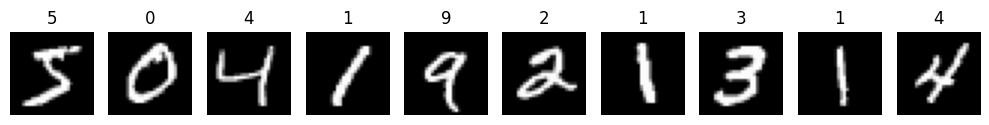

In [ ]:
import matplotlib.pyplot as plt

# Plot the first 10 images and their labels
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(str(y_train[i]))
    plt.axis('off')

plt.tight_layout()
plt.show()


## Section 3: Build a Neural Network

### **Task 3**: Define a Simple MLP Model

*Instruction*: Use Keras to create a simple feedforward neural network with:


*   Input layer (flatten)
*   2 hidden layers (128, 64 neurons) with ReLU
*   Output layer with softmax


In [ ]:
from tensorflow.keras import models, layers

# Define the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),         # Input layer (flatten 28x28 into 784)
    layers.Dense(128, activation='relu'),         # First hidden layer
    layers.Dense(64, activation='relu'),          # Second hidden layer
    layers.Dense(10, activation='softmax')        # Output layer (10 classes for digits 0-9)
])

# Print the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

## Section 4: Compile & Train

### **Task 4**: Compile and Fit the Model

*Instruction*: Compile using `adam` optimizer and `sparse_categorical_crossentropy` as loss function. Train for 10 epochs.

In [ ]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train (fit) the model
history = model.fit(
    x_train, y_train,
    epochs=10,
    validation_split=0.1,  # Optional: keep 10% of training data for validation
    verbose=2
)

Epoch 1/10
1688/1688 - 8s - 4ms/step - accuracy: 0.9221 - loss: 0.2586 - val_accuracy: 0.9660 - val_loss: 0.1127
Epoch 2/10
1688/1688 - 5s - 3ms/step - accuracy: 0.9668 - loss: 0.1079 - val_accuracy: 0.9750 - val_loss: 0.0791
Epoch 3/10
1688/1688 - 10s - 6ms/step - accuracy: 0.9775 - loss: 0.0740 - val_accuracy: 0.9738 - val_loss: 0.0903
Epoch 4/10
1688/1688 - 10s - 6ms/step - accuracy: 0.9818 - loss: 0.0581 - val_accuracy: 0.9762 - val_loss: 0.0799
Epoch 5/10
1688/1688 - 7s - 4ms/step - accuracy: 0.9861 - loss: 0.0454 - val_accuracy: 0.9758 - val_loss: 0.0842
Epoch 6/10
1688/1688 - 6s - 3ms/step - accuracy: 0.9884 - loss: 0.0353 - val_accuracy: 0.9792 - val_loss: 0.0772
Epoch 7/10
1688/1688 - 10s - 6ms/step - accuracy: 0.9899 - loss: 0.0310 - val_accuracy: 0.9800 - val_loss: 0.0773
Epoch 8/10
1688/1688 - 5s - 3ms/step - accuracy: 0.9920 - loss: 0.0256 - val_accuracy: 0.9785 - val_loss: 0.0880
Epoch 9/10
1688/1688 - 10s - 6ms/step - accuracy: 0.9935 - loss: 0.0213 - val_accuracy: 0.976

## Section 5: Evaluate the Model

### **Task 5**:  Test Accuracy and Confusion Matrix

*Instruction*: Evaluate the model on the test set and print confusion matrix.


313/313 - 1s - 4ms/step - accuracy: 0.9779 - loss: 0.0919

Test accuracy: 0.9779
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


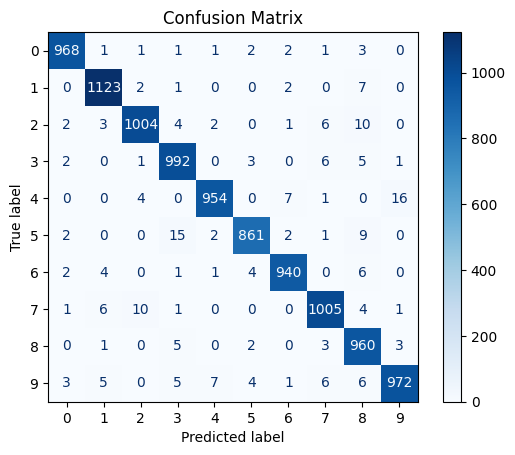

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_accuracy:.4f}")

# Predict labels for the test set
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## Section 6: Plot Training History

### **Task 6**: Visualize Accuracy and Loss

*Instruction*: Plot training vs validation accuracy and loss over epochs.

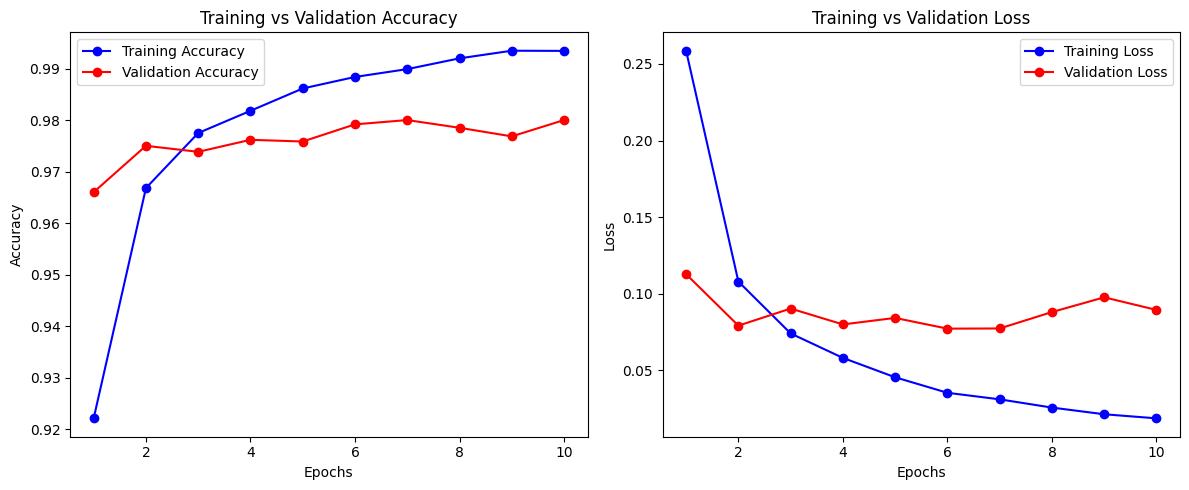

In [ ]:
# Extract the history data
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()